# TPC1 - Teoria de Probabilidades

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio. 
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas. 
* É preferível fazer menos e fazer bem que muito e mal. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [86]:
# Módulos
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

## Pergunta 1
**Gerador de números aleatórios:** Considere a distribuição log-logística
cuja densidade de probabilidade é dada por,
\begin{equation}
\rho(x)=\frac{\beta}{\alpha}\frac{(x/\alpha)^{\beta-1}}{\left(1+(x/\alpha)^{\beta}\right)^{2}}
\end{equation}
onde $x$ é uma variável aleatória real com suporte em $\mathbb{R}_{0}^{+}$.
O exponente $\beta$ limita o número de momentos finitos associados
a esta distribuição. 

1. Mostre que a distribuição de probabilidade cumulativa é dada por
\begin{equation}
C(x)=\frac{1}{1+\left(\frac{x}{\alpha}\right)^{-\beta}}
\end{equation}

A função de probabilidade cumulativa é dada por:
$$
\begin{align*}
C(x) &= \int_0^x \rho(u)\ du
\\\\
&= \int_0^x \frac\beta\alpha\cdot\frac{(u/\alpha)^{\beta-1}}{(1+(u/\alpha)^\beta)^2}\ du
\end{align*}
$$

Fazemos agora a seguinte mudança de variável:
$$
\begin{align*}
v &= 1 + (u/\alpha)^\beta
\\\\
dv &= \frac\beta\alpha(u/\alpha)^{\beta-1}du
\end{align*}
$$

Pelo que:
$$
\begin{align*}
C(x) &= \int_0^x \frac\beta\alpha\cdot\frac{(u/\alpha)^{\beta-1}}{(1+(u/\alpha)^\beta)^2}\ du
\\\\
&= \int_1^{1 + (x/\alpha)^\beta}\frac1{v^2}\ dv
\\\\
&= \left[-\frac1v\right]_1^{1 + (x/\alpha)^\beta}
\\\\
&= 1 - \frac1{1 + (x/\alpha)^\beta}
\\\\
&= \frac{1+(x/\alpha)^\beta-1}{1 + (x/\alpha)^\beta}
\\\\
&= \frac1{1+(x/\alpha)^{-\beta}}
\end{align*}
$$

2. Implemente o método de inversão e gere amostras para $\alpha=1$ e $\beta=\{1,1.6,2.1\}$. Compare os histogramas com a densidade de probabilidade exacta.

Começamos por inverter a função $C$:
$$
\begin{align*}
C(C^{-1}(x)) = x &\Leftrightarrow \frac1{1+(C^{-1}(x)/\alpha)^{-\beta}} = x
\\\\
&\Leftrightarrow 1 = x + x(C^{-1}(x)/\alpha)^{-\beta}
\\\\
&\Leftrightarrow \frac{1-x}{x} = (C^{-1}(x)/\alpha)^{-\beta}
\\\\
&\Leftrightarrow \alpha\left(\frac{1-x}{x}\right)^{-\frac1\beta} = C^{-1}(x)
\end{align*}
$$

### Análise dos Resultados
Podemos ver que os histogramas obtidos pelo método de inversão são compatíveis com as densidades de probabilidade associadas. Ou seja, de facto estamos a gerar amostras a partir da distribuição desejada.

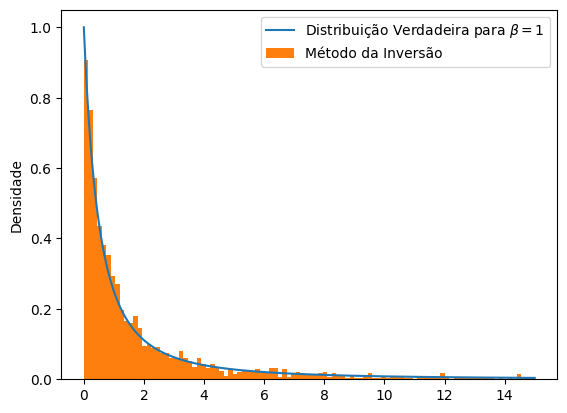

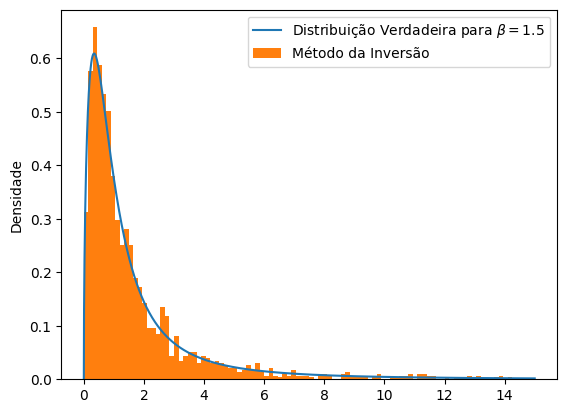

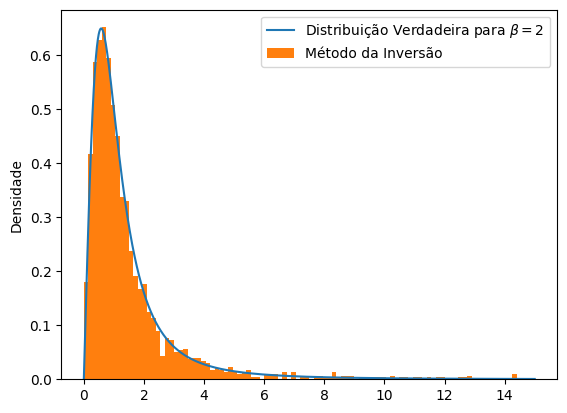

In [63]:
def invcontinuo(icdf: Callable, N: int) -> np.ndarray:
    """
        Dada a inversa de uma função de probabilidade acumulada `icdf` devolve `N` amostras retiradas da respetiva distribuição usando o método da inversão no contínuo.
    """
    
    # Resultados
    return icdf(np.random.rand(N))


# Funções PDF e iCDF
def gerarfuncs(alpha: float, beta: float) -> (Callable, Callable):
    return (lambda x: (beta/alpha) * ((x/alpha)**(beta-1)/(1+(x/alpha)**beta)**2), lambda x: alpha * (1/x-1)**(-1/beta))


N = 2000
bins = 100
alpha = 1
for beta in [1, 1.5, 2]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)

    # Gerar amostra
    amostra = invcontinuo(icdf, N)
    amaxi = min(max(amostra), 15)

    # Mostrar distribuição real no mesmo intervalo que a amostra
    xx = np.linspace(0, amaxi, N)
    yy = pdf(xx)

    # Representar graficamente
    plt.plot(xx, yy, label=f"Distribuição Verdadeira para $\\beta = {beta}$")
    plt.hist(amostra, bins, range=(0, amaxi), density=True, label="Método da Inversão")
    plt.ylabel("Densidade")
    plt.legend()
    plt.show()


3. Podemos tentar estimar o valor médio a partir do cálculo do estimador
da média,
\begin{equation}
\overline{X}_{N}=\frac{1}{N}\sum_{i=1}^{N}x_{i}.
\end{equation}
para uma amostra finita, o estimador é ele próprio uma variável aleatória
pelo que tem uma distribuição de probabilidade. Considerando experiências
nas quais que gera $N$ eventos e para cada uma calcula o estimador
do valor médio, obtenha, um histograma de frequências para cada uma
destas experiências, considerando, 

$\qquad$ a) $\beta=1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

### Análise dos Resultados
Podemos ver que os valores obtidos para a média continuam dispersos mesmo para $N$ grande!

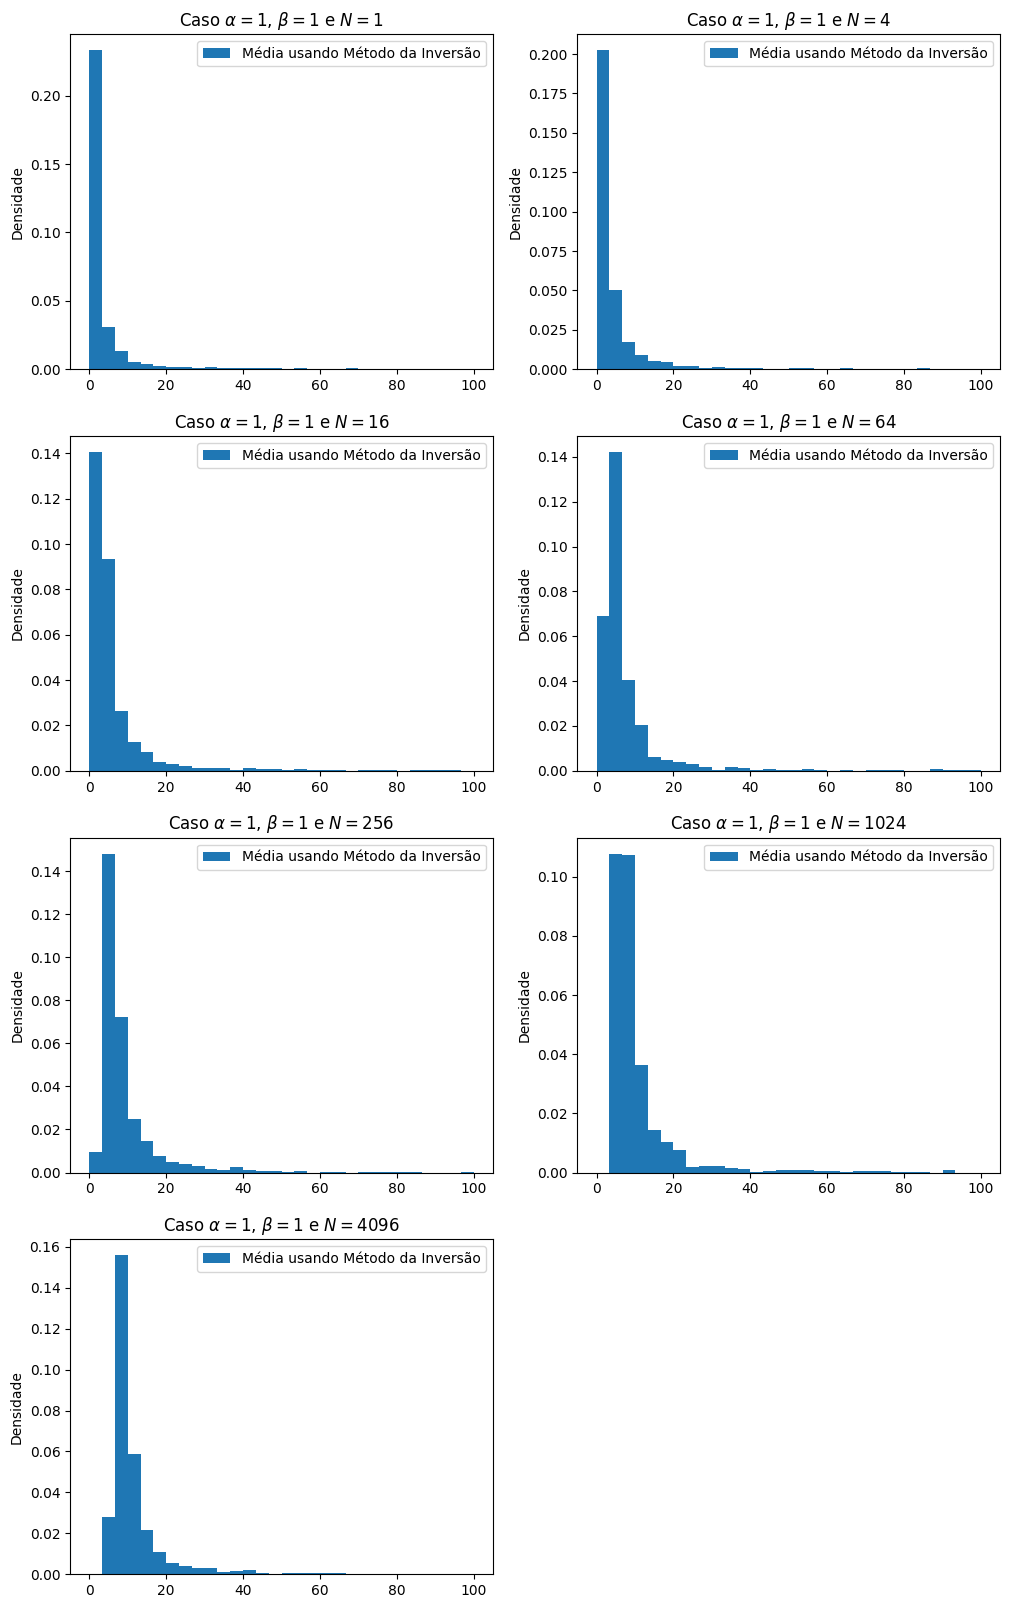

Amplitude das Médias na forma:
(N, {mínimo}, {máximo}, {amplitude})
(1, 0.00027766246449344997, 737.9247248807671, 737.9244472183027)
(4, 0.10847314429447116, 12510.930538336705, 12510.82206519241)
(16, 0.4077035522022191, 2743.6178172246277, 2743.2101136724255)
(64, 1.1593954605998538, 4574.742373765864, 4573.582978305264)
(256, 2.3933138963646043, 5936.855499537979, 5934.462185641614)
(1024, 3.9306345726523086, 3784.421912142342, 3780.49127756969)
(4096, 4.964103116742617, 691.5700284032444, 686.6059252865017)


In [64]:
# Parâmetros
reps = 2048
bins = 30
alpha = 1
beta = 1


# Amplitude das médias
ameds = []


# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)

# Agrupar por beta
cols = 2
rows = 4
plt.figure(figsize=(6 * cols, 5 * rows))
for pos, N in enumerate(2**np.arange(0, 14, 2)):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Janela de visualização
    maxi = min(max(medias), 100)

    # Amplitude das médias
    ameds += [(N, min(medias), max(medias), max(medias) - min(medias))]
    
    # Representar graficamente
    plt.subplot(rows, cols, pos+1)
    plt.title(f"Caso $\\alpha = {alpha}$, $\\beta = {beta}$ e $N = {N}$")
    plt.hist(medias, bins, range=(0, maxi), density=True, label="Média usando Método da Inversão")
    plt.ylabel("Densidade")
    plt.legend()

plt.show()

print("Amplitude das Médias na forma:")
print("(N, {mínimo}, {máximo}, {amplitude})")
for item in ameds:
    print(item)

$\qquad$ b) $\beta=1.6$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

### Análise dos Resultados
Podemos ver que os valores obtidos para a média estão em amplitudes cada vez menores para $N$ grande!

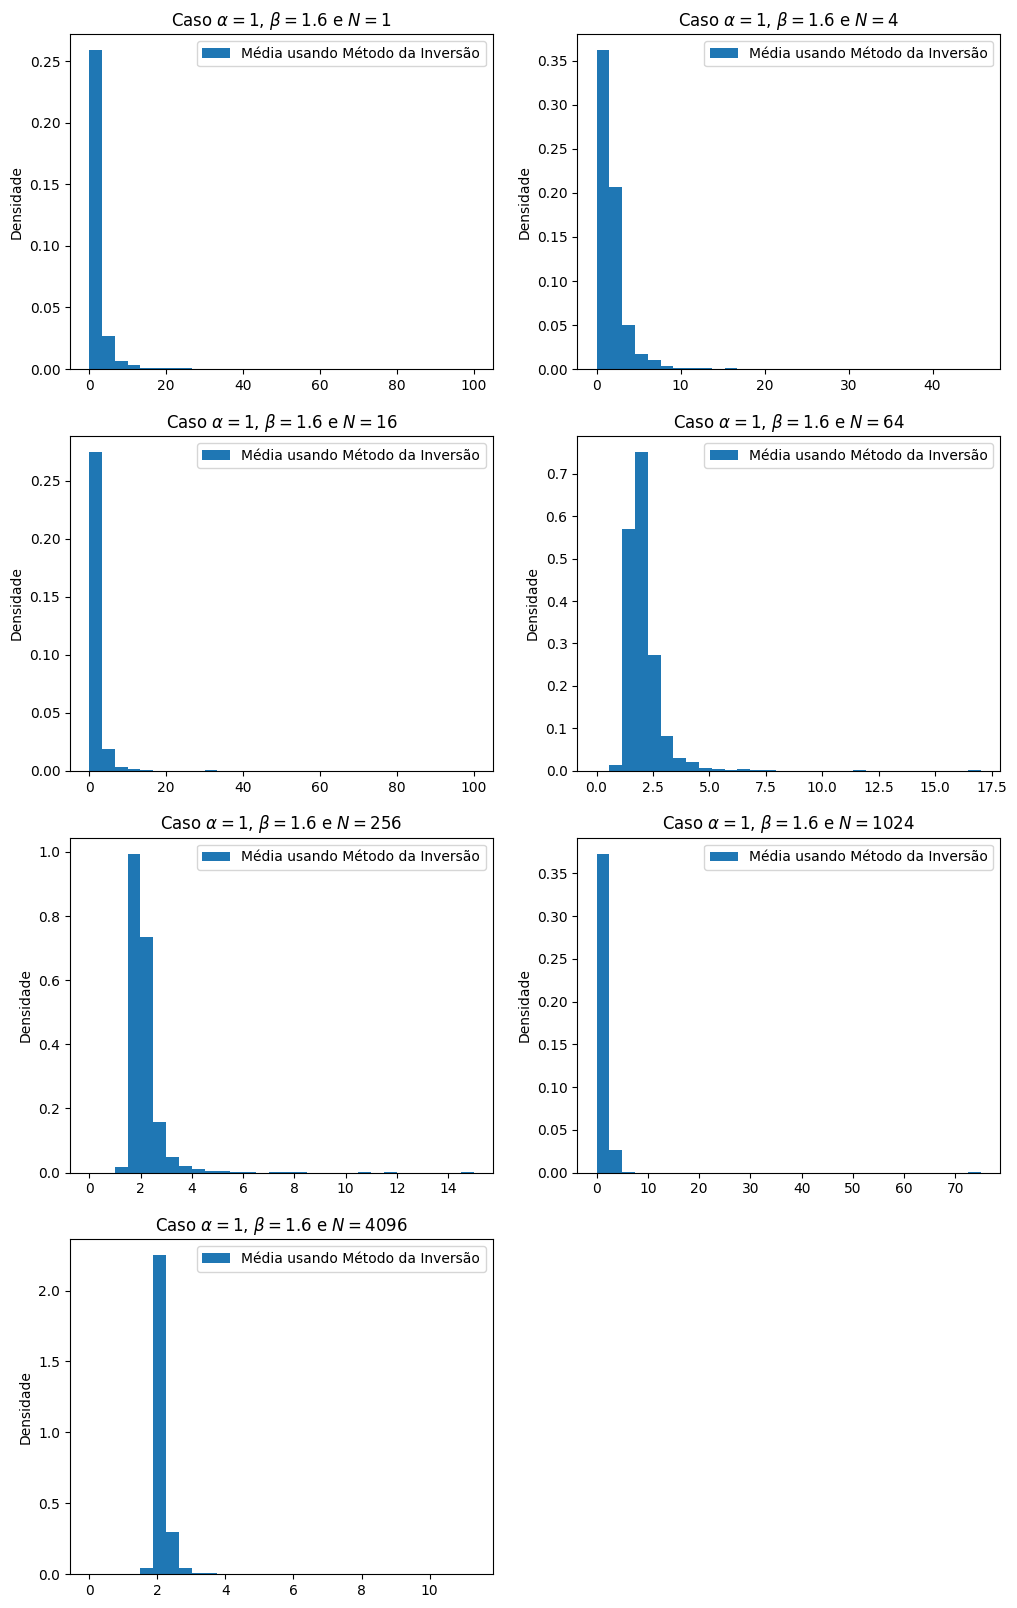

Amplitude das Médias na forma:
(N, {mínimo}, {máximo}, {amplitude})
(1, 0.002005862110583265, 127.40322374049398, 127.4012178783834)
(4, 0.134360627157903, 45.745105965282384, 45.61074533812448)
(16, 0.6489344299471833, 142.5275270125655, 141.87859258261832)
(64, 0.9963868404501316, 17.019811373336488, 16.023424532886356)
(256, 1.314024528814939, 14.98390462585591, 13.669880097040972)
(1024, 1.6372394406320294, 74.95153212586011, 73.31429268522808)
(4096, 1.812386834575852, 11.288926805109243, 9.476539970533391)


In [65]:
# Parâmetros
reps = 2048
bins = 30
alpha = 1
beta = 1.6


# Amplitude das médias
ameds = []


# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)

# Agrupar por beta
cols = 2
rows = 4
plt.figure(figsize=(6 * cols, 5 * rows))
for pos, N in enumerate(2**np.arange(0, 14, 2)):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Janela de visualização
    maxi = min(max(medias), 100)

    # Amplitude das médias
    ameds +=   [(N, min(medias), max(medias), max(medias) - min(medias))]
    
    # Representar graficamente
    plt.subplot(rows, cols, pos+1)
    plt.title(f"Caso $\\alpha = {alpha}$, $\\beta = {beta}$ e $N = {N}$")
    plt.hist(medias, bins, range=(0, maxi), density=True, label="Média usando Método da Inversão")
    plt.ylabel("Densidade")
    plt.legend()

plt.show()

print("Amplitude das Médias na forma:")
print("(N, {mínimo}, {máximo}, {amplitude})")
for item in ameds:
    print(item)

$\qquad$ c) $\beta=2.1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

### Análise dos Resultados
Podemos ver que os valores obtidos para a média estão em amplitudes cada vez menores para $N$ grande!

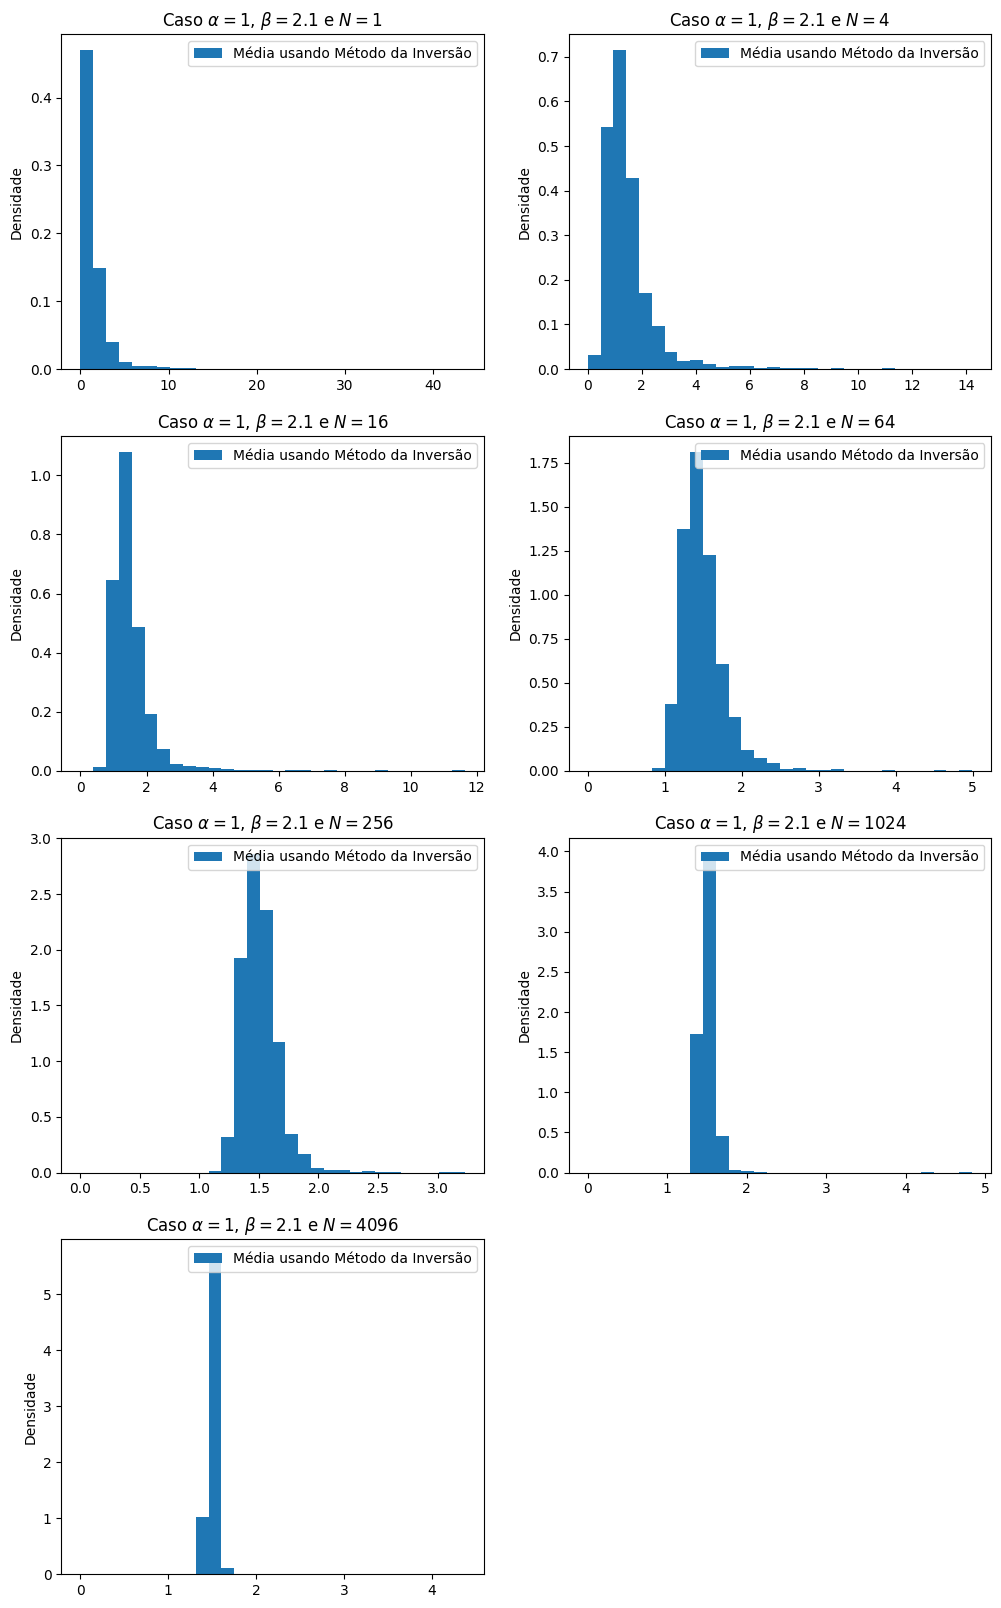

Amplitude das Médias na forma:
(N, {mínimo}, {máximo}, {amplitude})
(1, 0.044226214937938706, 43.61773964502001, 43.57351343008207)
(4, 0.32070939859516373, 14.219428572987376, 13.898719174392212)
(16, 0.6479646628428684, 11.643844169510288, 10.99587950666742)
(64, 0.971268393074247, 4.992747421910537, 4.02147902883629)
(256, 1.1476402792938118, 3.2292938375582247, 2.0816535582644127)
(1024, 1.3026815444982893, 4.834146604555832, 3.5314650600575423)
(4096, 1.3701164819579732, 4.373651231455033, 3.0035347494970592)


In [66]:
# Parâmetros
reps = 2048
bins = 30
alpha = 1
beta = 2.1


# Amplitude das médias
ameds = []


# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)

# Agrupar por beta
cols = 2
rows = 4
plt.figure(figsize=(6 * cols, 5 * rows))
for pos, N in enumerate(2**np.arange(0, 14, 2)):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Janela de visualização
    maxi = min(max(medias), 100)

    # Amplitude das médias
    ameds +=   [(N, min(medias), max(medias), max(medias) - min(medias))]
    
    # Representar graficamente
    plt.subplot(rows, cols, pos+1)
    plt.title(f"Caso $\\alpha = {alpha}$, $\\beta = {beta}$ e $N = {N}$")
    plt.hist(medias, bins, range=(0, maxi), density=True, label="Média usando Método da Inversão")
    plt.ylabel("Densidade")
    plt.legend()

plt.show()

print("Amplitude das Médias na forma:")
print("(N, {mínimo}, {máximo}, {amplitude})")
for item in ameds:
    print(item)

4. O que conclui da observações que fez? Em quais das situações é possível determinar um valor médio? Porquê?

O $n$-ésimo momento será dado por:
$$
\begin{align*}
\lang x^n\rang &= \int_0^{+\infty}x^n\rho(x)\ dx
\\\\
&= \int_0^{+\infty} \frac\beta\alpha\cdot\frac{x^n(x/\alpha)^{\beta-1}}{(1+(x/\alpha)^\beta)^2}\ dx
\end{align*}
$$

Fazemos agora a mudança para a variável $v = x/\alpha$:
$$
\begin{align*}
\lang x^n\rang &= \alpha^n\beta\int_0^{+\infty} \frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv
\\\\
&= \alpha\beta\left[\int_0^1 \frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv + \int_1^{+\infty}\frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv\right]
\end{align*}
$$

Notamos logo que o primeiro integral converge. Para $v \ge 1$ e $\beta \ge 1$ temos que:
$$
\begin{align*}
f_1(v) = v^{-\beta-1+n} = \frac{v^{\beta-1+n}}{(v^\beta)^2}\ge \frac{v^{\beta-1+n}}{(1+v^\beta)^2} \ge \frac{v^\beta}{(v^{\beta}+v^\beta)^2} = \frac{v^{-\beta-1+n}}{4} = f_2(v)
\end{align*}
$$

Vamos agora considerar integrais de domínio em $[1, +\infty[$:
- O integral de $f_2$ converge para $\beta > n$ logo o integral da função enquadrada também converge.
- O integral de $f_1$ diverge para $\beta \le n$ logo o integral da função enquadrada também diverge.

Para o caso de $n=1$, percebemos que o valor médio $\lang x\rang$ só está definido se $\beta > 1$.

---

Podemos verificar este facto nos gráficos da alínea 3. pois no primeiro conjunto de gráficos vemos que os valores obtidos para a média continuam muito dispersos mesmo para $N$ elevado (a amplitude dos valores obtidos continua com amplitude elevada).

In [67]:
# Responda Aqui

5. Considerando o caso em que $\beta=2.1$, represente como função de $N$
o desvio padrão da amostra de medidas de $\overline{X}_{N}$. Qual
o significado deste comportamento para a medição de um valor médio?

### Análise de Resultados

Podemos notar que o desvio padrão da variável aleatória $\bar X_N$ diminui à medida que o valor de $N$ aumenta.

Isto quer dizer que a variável $\bar X_N$ está a ficar cada vez mais concentrada em torno de um só valor! Como este é um estimador centrado para a média de $X$ então sabemos que esse valor deve ser $\lang X \rang$!

---

De forma mais quantitativa, sabemos que a variância de $\bar X_N$ verifica:

$$
\begin{align*}
\sigma(\bar X_N) &= \frac1{N}\sqrt{\sum_{i=1}^N \text{Var}[X_i]}
\\\\
&= \frac1N\cdot\sqrt{N}\sigma(X_i)
\\\\
&= \frac{\sigma(X_i)}{\sqrt N}
\end{align*}
$$

Sendo que esta expressão apenas é válida caso $\sigma(X_i)$ esteja definido, o que apenas é verdade caso $\beta > 2$.

Assim, como seria de esperar, observamos no gráfico abaixo que para $\beta = 2.1$ o desvio padrão de uma amostra de $\bar X_N$ de tamanho fixo diminui de forma proporcional a $1/\sqrt N$.

Logo, para $N$ suficientemente grande podemos estar confiantes que o valor de $\bar X_N$ está de facto muito próximo da média.

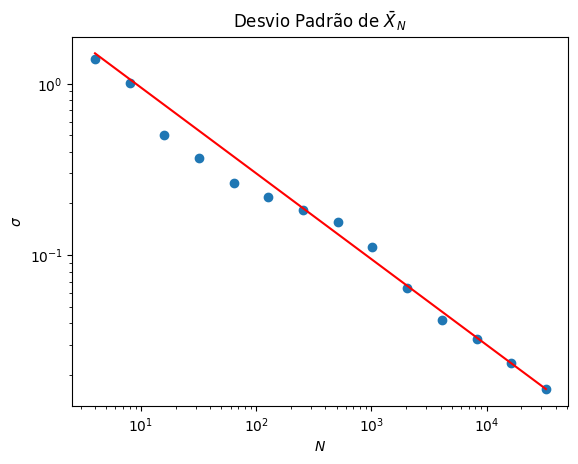

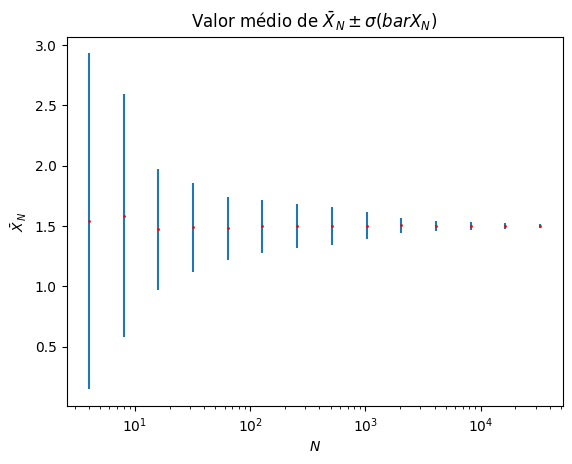

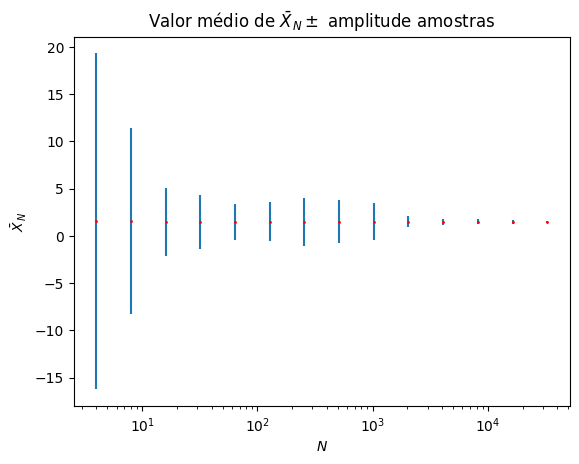

Desvios padrão: [1.39284162 1.00956277 0.50142668 0.36758584 0.26349596 0.21941708
 0.18263756 0.15530436 0.11193066 0.06463367 0.04201339 0.03265453
 0.02337628 0.01651653]


In [68]:
# Parâmetros
reps = 512
alpha = 1
beta = 2.1

# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)
NN = 2**np.arange(2, 16)

meds = np.empty(len(NN))
stds = np.empty(len(NN))
amps = np.empty(len(NN))

data = []
for pos, N in enumerate(NN):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Calcular desvio padrão
    meds[pos] = np.average(medias)
    stds[pos] = np.std(medias, ddof=1)
    amps[pos] = max(medias) - min(medias)

    # Guardar o valor
    data += [medias]

# Representar graficamente
plt.title(f"Desvio Padrão de $\\bar X_N$")
plt.scatter(NN, stds, label="Desvio padrão")
plt.plot(NN, 3 * np.sqrt(NN)**(-1), color="red", label="Função $1/\\sqrt{N}$")
plt.xlabel("$N$")
plt.ylabel("$\\sigma$")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N \\pm \\sigma(bar X_N)$")
plt.errorbar(NN, meds, stds, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N \\pm$ amplitude amostras")
plt.errorbar(NN, meds, amps, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()


print("Desvios padrão:", stds)

6. Repita a análise anterior para $\beta=1.6$. O que conclui neste caso? Será possível medir um valor médio? Como compatibiliza com o resultado anterior? Afinal é possível ou não medir este valor médio? Será que uma análise de percentis é útil?

### Análise dos Resultados
Neste caso o estimador da média irá também ser centrado, pois a distribuição tem média definida.

Usando a Lei dos Números Grandes na versão mais fraca, temos que, caso a média de $X_i$ exista (mesmo que tenha variância infinita)iremos ter que o valor de $\bar X_N$ será cada vez mais próximo de $\lang X_i\rang$.

O que vemos neste caso é que a convergência é mais lenta que $1/\sqrt{N}$! Isto faz sentido pois a variância da variável subjacente não é finita, pelo que a análise acima não se aplica.

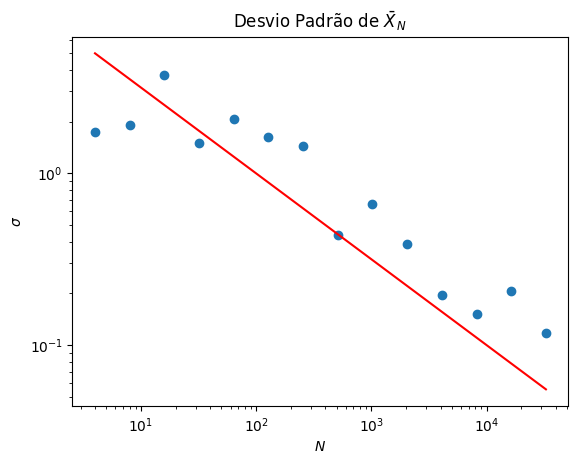

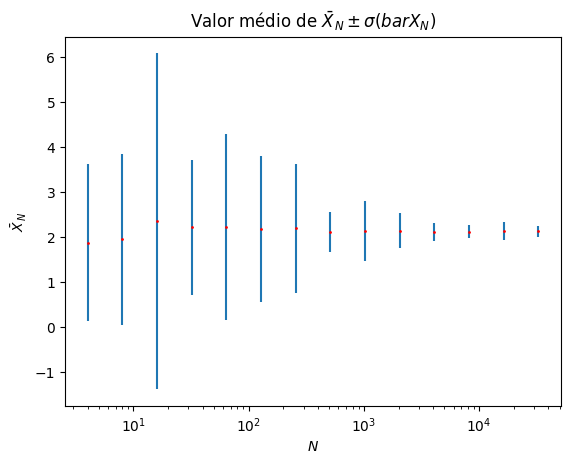

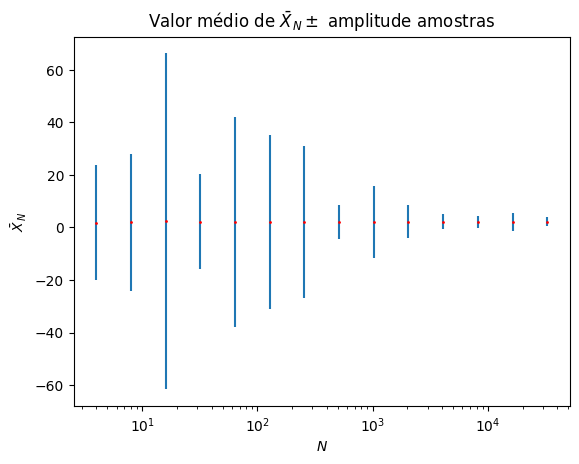

Desvios padrão: [1.7402018  1.9023829  3.73309959 1.49956695 2.06840362 1.62522732
 1.43466137 0.43549383 0.66563123 0.3853082  0.19622172 0.15148959
 0.20702078 0.11778619]


In [69]:
# Parâmetros
reps = 512
alpha = 1
beta = 1.6

# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)
NN = 2**np.arange(2, 16)

meds = np.empty(len(NN))
stds = np.empty(len(NN))
amps = np.empty(len(NN))

data = []
for pos, N in enumerate(NN):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Calcular desvio padrão
    meds[pos] = np.average(medias)
    stds[pos] = np.std(medias, ddof=1)
    amps[pos] = max(medias) - min(medias)

    # Guardar o valor
    data += [medias]

# Representar graficamente
plt.title(f"Desvio Padrão de $\\bar X_N$")
plt.scatter(NN, stds, label="Desvio padrão")
plt.plot(NN, 10 * np.sqrt(NN)**(-1), color="red", label="Função $1/\\sqrt{N}$")
plt.xlabel("$N$")
plt.ylabel("$\\sigma$")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N \\pm \\sigma(bar X_N)$")
plt.errorbar(NN, meds, stds, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N \\pm$ amplitude amostras")
plt.errorbar(NN, meds, amps, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()


print("Desvios padrão:", stds)

## Pergunta 2

**Amostragem por importância:** A função característica da distribuição
de probabilidade da média de $N$ variáveis é dada por, 
\begin{equation}
\phi(k,N)=\left(\int_{0}^{+\infty}dx\rho(x)e^{-i\frac{k}{N}x}\right)^{N}=\phi^{N}\left(\frac{k}{N},1\right),
\end{equation}
Para estimar o integral é possível calcular usar o método de amostragem
por importância para cada valor de $k$. Considerando $\beta=1.6$
e $\beta=2.1$:

1. Calcule como função de $k$ o integral da função característica de
$\rho(x)$ e estime a barra de erro usando $128$ medidas. Represente
os pontos com as respectivas barras de erro. 

A expressão do enunciado indica a função característica da distribuição de probabilidade de uma variável $X$ dada por:
$$
\begin{align*}
X = \frac1N\sum_{i=1}^N X_i
\end{align*}
$$

Onde todas as variáveis $X_i$ são independentes entre si e identicamente distribuidas de acordo da função densidade de probabilidade $\rho$.

---

Vamos calcular o integral desejado usado amostragem por importância:

$$
\begin{align*}
\int_0^{+\infty} \rho(x)e^{-i\frac kN x}\ dx &= \lang e^{-i\frac kN x}\rang_\rho
\\\\
&\approx \frac1N\sum_{j=1}^Ne^{-i\frac kN x_j}
\end{align*}
$$

Onde os $x_j$ são amostrados da distribuição $\rho$.

O erro deste método deverá ser proporcional a $1/\sqrt N$. Para estimar o erro e o valor mais provável para o integral vamos fazer o seguinte:
- Calculamos o integral para cada $k$ 128 vezes, tomando como resultado a média dos valores obtidos.
- A incerteza associada ao valor médio será o desvio padrão da amostra.


Vamos apenas calcular para $k \ge 0$ pois a transformada de Fourier de uma função real $f$ tem simetria hermítica:
$$
\begin{align*}
\tilde f(\omega) &= \tilde f^*(-\omega)
\end{align*}
$$

c:\Users\guilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


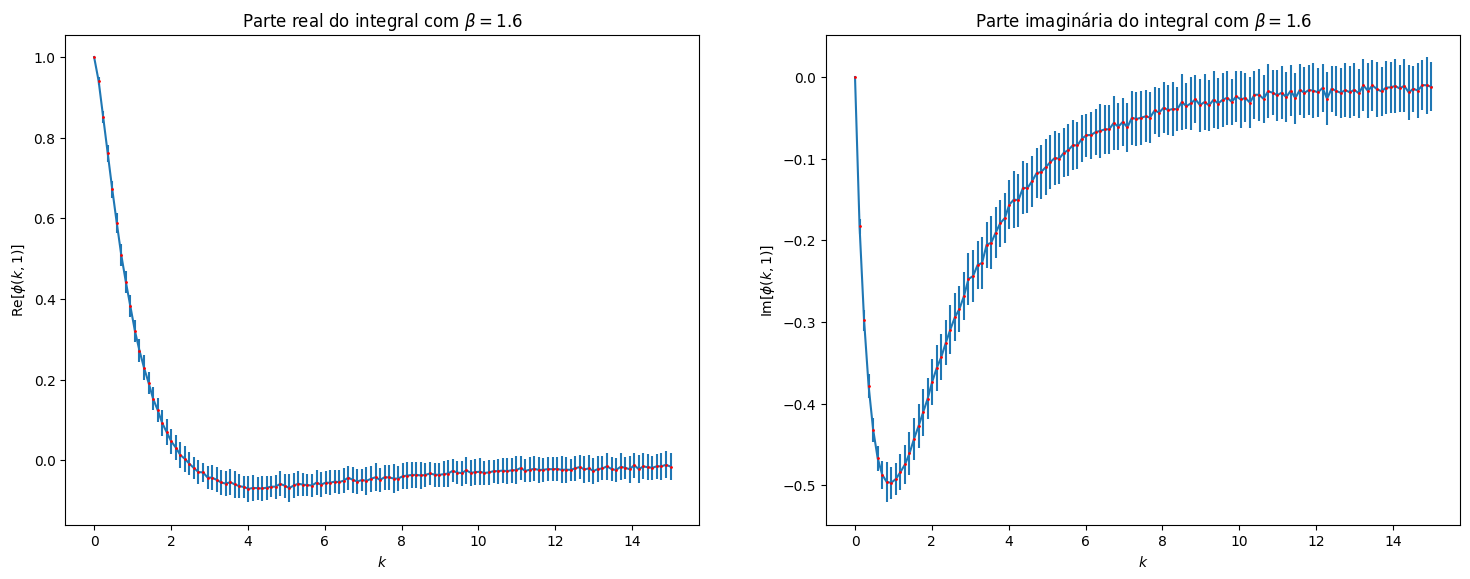

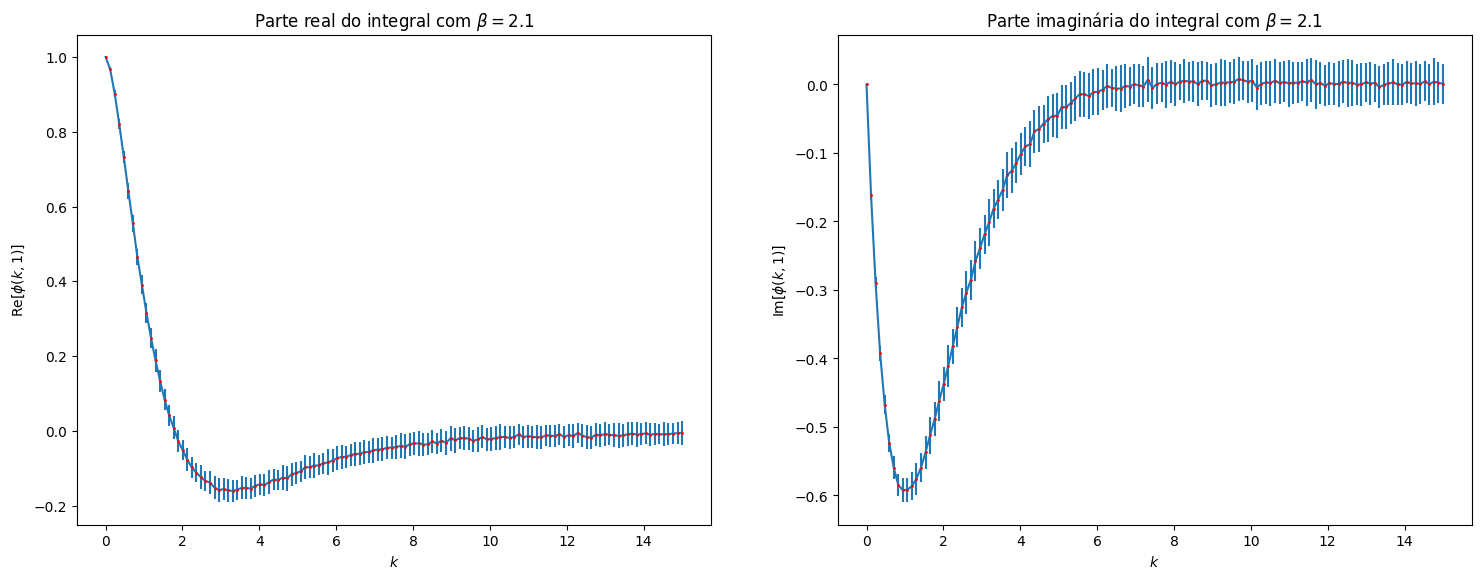

In [70]:
# Parâmetros
M = 512 # Tamanho da amostra usada para calcular o integral
reps = 128
alpha = 1

start = 0
end = 15
points = 128

kk = np.linspace(start, end, points)

# Representação Gráfica
grafpos = 1
cols = 2
rows = 2
for beta in [1.6, 2.1]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)

    meds = np.empty(len(kk), dtype=np.complex128)
    stds = (np.empty(len(kk), dtype=np.complex128), np.empty(len(kk), dtype=np.complex128))
    for pos, k in enumerate(kk):

        integral = np.empty(reps, dtype=np.complex128)
        for i in range(reps):
            # Gerar amostra
            amostra = invcontinuo(icdf, M)

            # Estimar integral
            integral[i] = np.mean(np.exp(-1j * k * amostra))
        
        # Calcular desvio padrão
        meds[pos] = np.average(integral)
        stds[0][pos] = np.std(np.real(integral), ddof=1)
        stds[1][pos] = np.std(np.imag(integral), ddof=1)

    
    plt.figure(figsize=(9 * cols, 7 * rows))

    # Representar graficamente
    plt.subplot(rows, cols, grafpos)
    plt.title(f"Parte real do integral com $\\beta = {beta}$")
    plt.errorbar(kk, np.real(meds), stds[0], fmt="o-", ms=1, mfc="red", mec="red")
    plt.xlabel("$k$")
    plt.ylabel("Re[$\\phi(k, 1)$]")

    plt.subplot(rows, cols, grafpos+1)
    plt.title(f"Parte imaginária do integral com $\\beta = {beta}$")
    plt.errorbar(kk, np.imag(meds), stds[1], fmt="o-", ms=1, mfc="red", mec="red")
    plt.xlabel("$k$")
    plt.ylabel("Im[$\\phi(k, 1)$]")

    grafpos += 2

plt.show()

2. Sendo $\phi(k)$ uma função complexa, $\phi(k,N)$ também será. Considerando
que escreve $\phi=re^{i\Theta}$, ou seja, à custa de uma parte real
e uma fase, 
\begin{equation}
\phi(k,N)=r^{N}\left(\frac{k}{N}\right)e^{iN\Theta(k/N)},
\end{equation}
represente $R(k,N)=r^{N}\left(k/N\right)$ e $N\Theta(k/N)$ como
função de $k$ para diferentes valores de $N$. O que observa?

### Análise de Resultados
Podemos ver que a função radial converge mais lentamente à medida que aumentamos o valor de $N$.

c:\Users\guilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


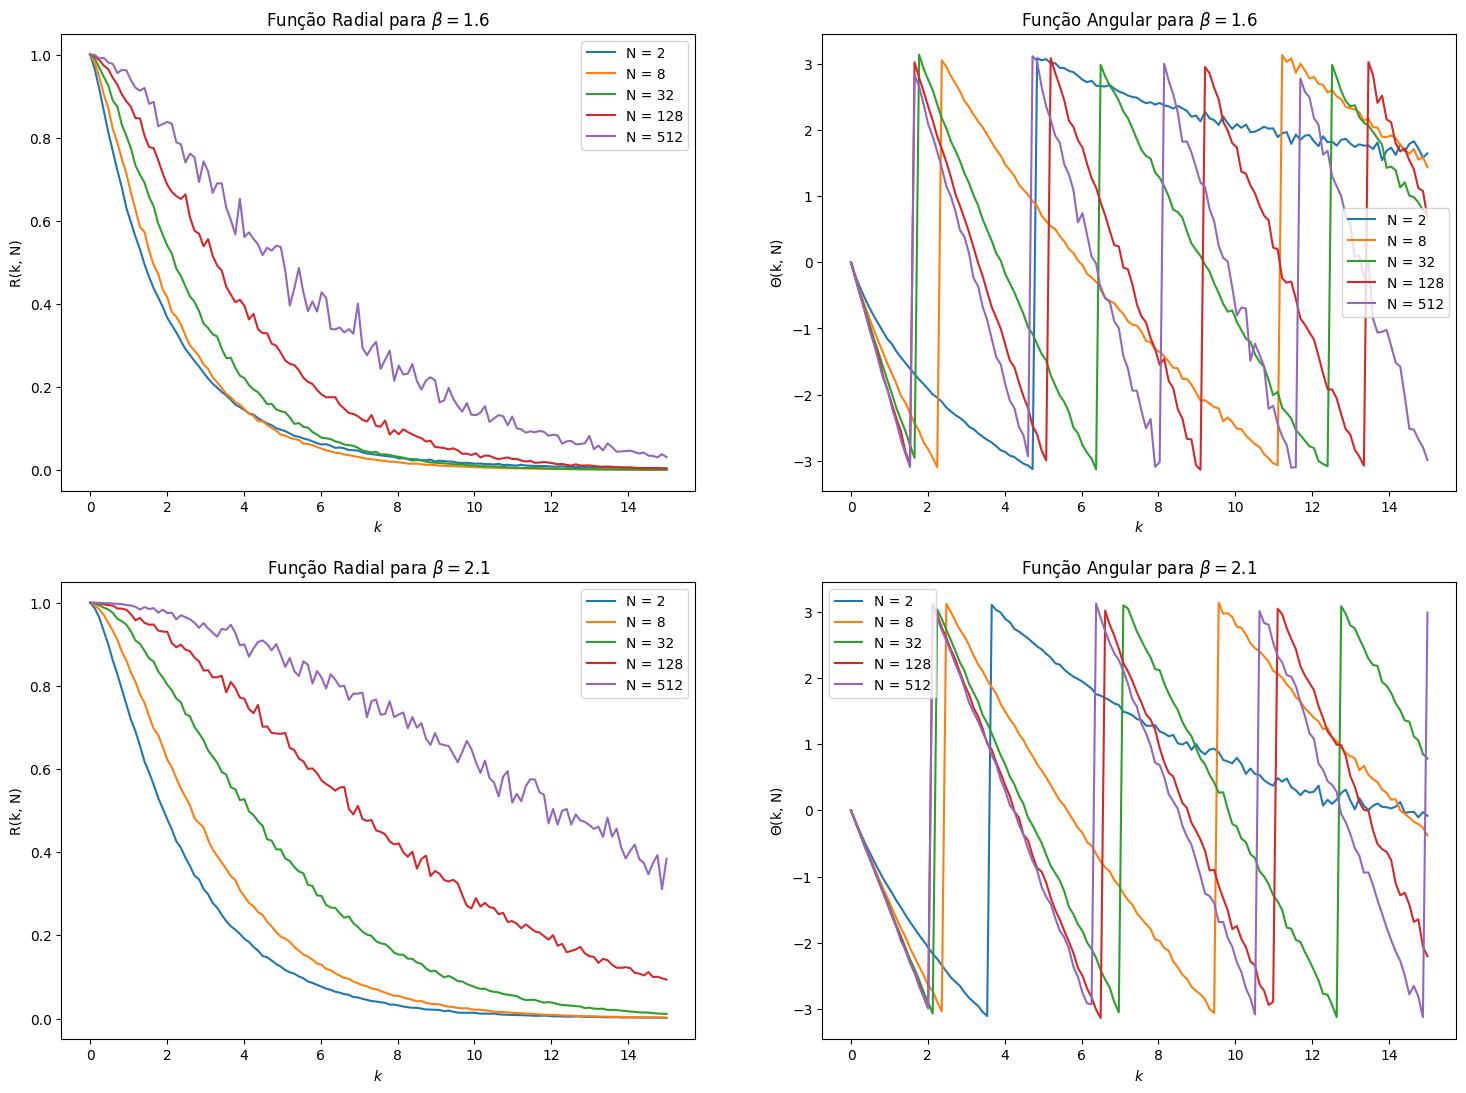

In [71]:
# Parâmetros
M = 512 # Tamanho da amostra usada para calcular o integral
alpha = 1

start = 0
end = 15
points = 128

kk = np.linspace(start, end, points)
NN = 2 ** np.arange(1, 10, 2)

# Representação Gráfica
grafpos = -1
cols = 2
rows = 2 * len(NN)

plt.figure(figsize=(9 * cols, 7 * rows))
for beta in [1.6, 2.1]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)
    grafpos += 2

    meds = (np.empty(len(kk), dtype=np.complex128), np.empty(len(kk), dtype=np.complex128))
    for N in NN:
        for pos, k in enumerate(kk):

            integral = np.empty(reps, dtype=np.complex128)
            for i in range(reps):
                # Gerar amostra
                amostra = invcontinuo(icdf, M)

                # Estimar integral
                integral[i] = np.mean(np.exp(-1j * (k/N) * amostra))
            
            # Calcular média
            imed = (np.average(integral))**N
            meds[0][pos] = np.abs(imed)
            meds[1][pos] = np.angle(imed)

        

        # Representar graficamente
        plt.subplot(rows, cols, grafpos)
        plt.title(f"Função Radial para $\\beta = {beta}$")
        plt.plot(kk, meds[0], label=f"N = {N}")
        plt.xlabel("$k$")
        plt.ylabel("R(k, N)")
        plt.legend()

        plt.subplot(rows, cols, grafpos+1)
        plt.title(f"Função Angular para $\\beta = {beta}$")
        plt.plot(kk, meds[1], label=f"N = {N}")
        plt.xlabel("$k$")
        plt.ylabel("$\\Theta$(k, N)")
        plt.legend()


plt.show()

3.  A demonstração mais frequente do teorema do limite central é feita através de uma expansão em cumulantes. Contudo nem sempre esta expansão é possível ser feita uma vez que os cumulantes podem ser divergentes. Uma possibilidade é estudar o escalamento da distribuição característica com o tamanho do sistema. Explique como é que com o escalamento destas funções pode caracterizar a distribuição da média $\overline{X}_{N}$? 

Sugestões: 

• Se o valor médio estiver definido deve existir uma transformação de coordenadas $\overline{X}_{N}=\langle x\rangle+N^{\gamma}y$, tal que $\rho(y)$ deverá ser independente de $N$ para $N$ grande. 

• Para caracterizar o escalamento de $R(k,N)$ pode encontrar o expoente $\beta$ tal que $R(k'N^{\beta},N)=f(k')$. 

Se encontrarmos o exponente $\beta$ de forma a podermos escrever $f(k')$ então sabemos que se essa função for igual à transformada de Fourier de uma gaussiana com média igual à média da distribuição e variância igual à variância da distribuição a dividir por $\sqrt N$ conseguimos provar o teorema do limite central!

Isto apenas deverá ser possível para $\beta > 2$ pois só nesse caso é que a variância é finita!

### Bom Trabalho